In [2]:
import pandas as pd 
import numpy as np

In [3]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("titanic.csv", usecols= ["Age", "Fare", "Survived"])

In [5]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [6]:
df.dropna(inplace = True)

In [7]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
885,0,39.0,29.1250
886,0,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [31]:
x= df.iloc[:,1:]
y= df.iloc[:,0]

In [32]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2, random_state = 42)

In [10]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred = clf.predict(x_test)

In [14]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [15]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring="accuracy"))

0.6330594679186229

In [16]:
kbin_age = KBinsDiscretizer(n_bins = 10, encode = "ordinal", strategy = "quantile")
kbin_fare = KBinsDiscretizer(n_bins = 10, encode = "ordinal", strategy = "quantile")

In [17]:
trf = ColumnTransformer([
    ("First",kbin_age,[0]),
    ('Second',kbin_fare,[1])
    
])

In [18]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [19]:
trf.named_transformers_['Second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [20]:
trf.named_transformers_['First'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [22]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [24]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                                    bins=trf.named_transformers_['First'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                                    bins=trf.named_transformers_['Second'].bin_edges_[0].tolist())

In [25]:
output.sample(5)


,age,age_trf,fare,fare_trf,age_labels,fare_labels
432,42.0,8.0,26.0000,6.0,"(36.0, 42.0]","(15.75, 26.0]"
391,21.0,2.0,7.7958,1.0,"(19.0, 22.0]","(7.75, 7.896]"
723,50.0,9.0,13.0000,4.0,"(42.0, 50.0]","(9.225, 13.0]"
512,36.0,7.0,26.2875,6.0,"(32.0, 36.0]","(26.0, 29.125]"
130,33.0,6.0,7.8958,2.0,"(32.0, 36.0]","(7.75, 7.896]"


In [27]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [28]:
accuracy_score(y_test,y_pred2)


0.6223776223776224

In [33]:
X_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6358959311424099

In [53]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('First',kbin_age,[0]),
        ('Second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='orange')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='green')
    plt.title("Fare")

    plt.show()


0.6303403755868544


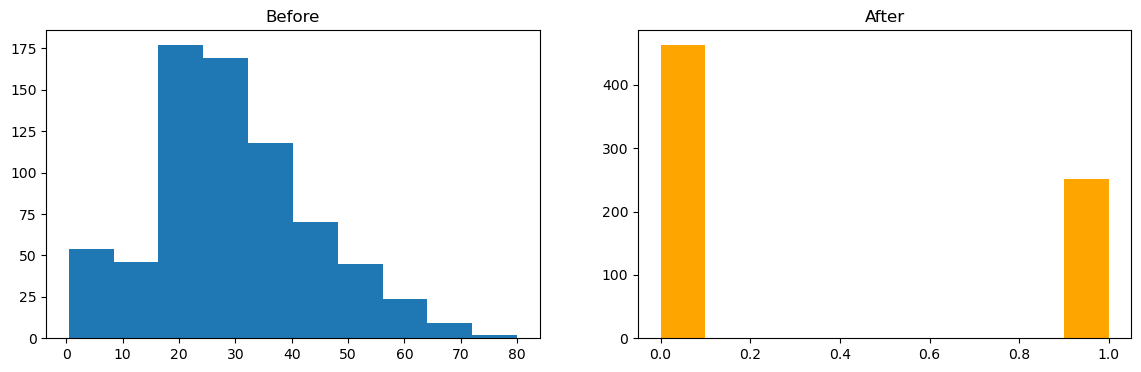

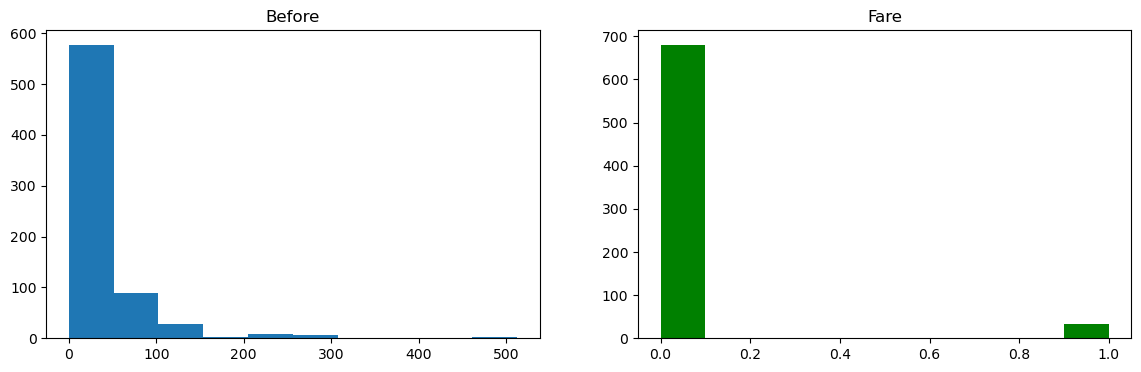

In [54]:
discretize(2,'kmeans')